# PCA

In [2]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## Theoretical Questions

##### 1. Pearson's Formulation of PCA

Karl Pearson's 1903 paper, <a href = "https://www.tandfonline.com/doi/abs/10.1080/14786440109462720"><i>On lines and planes of closest fit to systems of points in space</i></a>, was the original introduction of PCA.

In this paper Pearson contemplated what we mean by line (or plane) of best fit. In regression the approach is to find the line of best fit by minimizing the distance between the estimate, $\hat{y}$, and the actual value, $y$. Pearson wondered what if instead we considered minimizing the distance between the data points and the hyperplane fit to those points.

Consider this image from Pearson's 1903 paper.

<img src = "PearsonLine.png" width = "500"></img>

It turns out that this formulation is equivalent to maximizing the variance.


Read through page 352 here, <a href="https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf">https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf</a> for a derivation of that fact.

In [3]:
## Write any notes here




##### 2. The Relationship of PCA to SVD

Recall that the PCA component vectors are given by the eigenvectors of $\Sigma$, the covariance matrix of the data matrix $X$, where the columns of $X$ have all been centered at $0$.

Any covariance matrix is symmetric, and thus is diagonalizable. So $\Sigma = Q^T \Lambda Q$ for some matrix $Q$. 

In a potential abuse of notation let $X = U \sigma V^T$ be the singular value decomposition of $X$.

Now recall that the sample covariance matrix can be computed as $X^T X$.

Recalculate $X^T X$ substituting in the SVD of $X$, what do you find? Hint: $V$ is orthonormal.

In [4]:
## Write here







In [5]:
## Write here







It is actually much safer to calculate the SVD of $X$ rather than find the eigenvectors of $X^T X$, and this is what `sklearn` does.

## Applied Questions

##### 1. PCA Handles Multicolinearity

Here's a very simple example of how PCA can be helpful in regression tasks.

In [6]:
X = np.zeros((1000,2))

X[:,0] = 4*np.random.randn(1000)
X[:,1] = 2*X[:,0] + np.random.randn(1000)

y = X[:,0] + 12 + X[:,1] + 1.5*np.random.randn(1000)

In [7]:
df = pd.DataFrame({'x1':X[:,0],'x2':X[:,1],'y':y})

In [8]:
from pandas.plotting import scatter_matrix

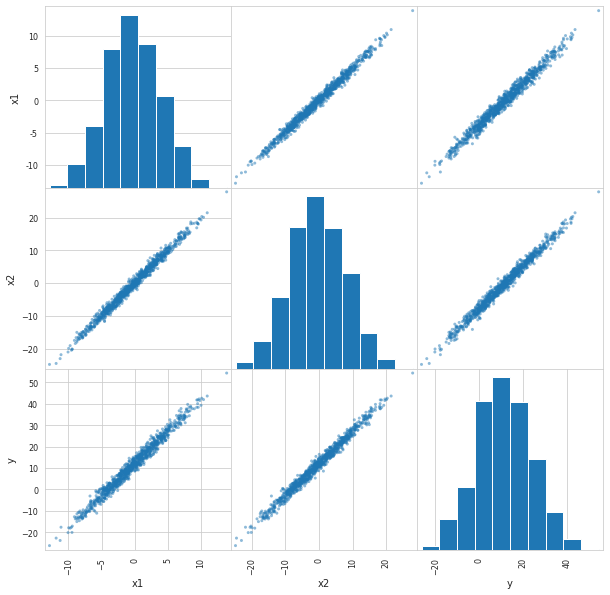

In [9]:
scatter_matrix(df, figsize=(10,10))
plt.show()

In [10]:
df.corr()

,x1,x2,y
x1,1.000000,0.993179,0.988661
x2,0.993179,1.000000,0.991628
y,0.988661,0.991628,1.000000


Examine `df` for multicolinearity.

Then apply PCA to `X` using 2 components. Add the PCA transformed `X` as new columns of `df`.

Examine those columns for multicolinearity and their relationship with `y`.

What do you notice?

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
x_new = pca.transform(X)
print(type(x_new), x_new.shape)

<class 'numpy.ndarray'> (1000, 2)


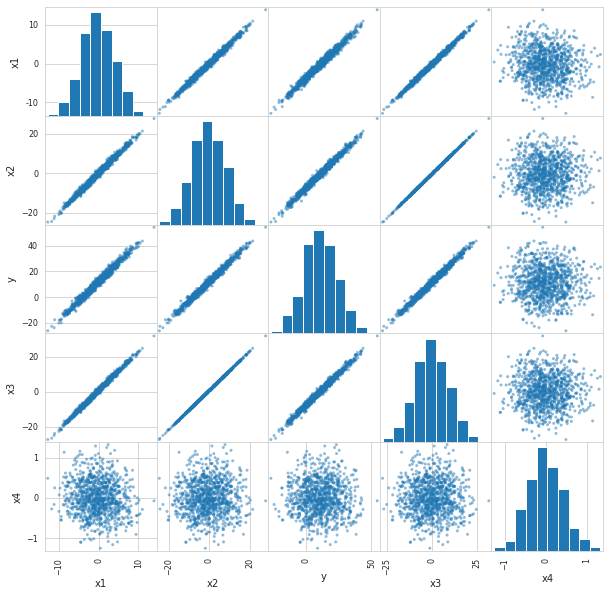

In [12]:
df['x3'] = x_new[:,0]
df['x4'] = x_new[:,1]
df.head()
scatter_matrix(df, figsize=(10,10))
plt.show()

##### 2. PCA on Roll Call Votes

Read in the data `Senate_115_roll_mat.csv` below. Note you'll need to unzip this data file in your repository first.

This data set contains the roll call votes for the 115th Senate. Run the votes through PCA with 2 components. Plot the fitted data colored by their `party_code`. What do you find?

In [15]:
#votes = pd.read_csv("Senate_115_roll_mat.csv")
votes = pd.read_csv("/home/wayne/main/git/2020FallPilot/Homework/UnsupervisedLearning/Senate_115_roll_mat.csv")
votes.head()


,name,icpsr,party_code,1,2,3,4,5,6,7,...,590,591,592,593,594,595,596,597,598,599
0,"GRASSLEY, Charles Ernest",14226,200,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0
1,"LEAHY, Patrick Joseph",14307,100,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,...,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
2,"MARKEY, Edward John",14435,100,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,...,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
3,"HATCH, Orrin Grant",14503,200,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,0.0
4,"NELSON, Clarence William (Bill)",14651,100,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,...,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0


In [16]:
votes['party_code'].value_counts()

200    29351
100    26955
328     1198
Name: party_code, dtype: int64

In [17]:
votes_cols = [str(i) for i in range(1, 600)]
X_votes = votes[votes_cols].to_numpy()
y_votes = votes['party_code'].to_numpy()
pca_votes = PCA(n_components=2)
pca_votes.fit(X_votes)
X_fit = pca_votes.transform(X_votes)

MemoryError: 

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X_fit[y_votes==100, 0],X_fit[y_votes==100, 1], c='k', label="party 1")
plt.scatter(X_fit[y_votes==200, 0],X_fit[y_votes==200, 1], c='r', label="party 2")
plt.scatter(X_fit[y_votes==328, 0],X_fit[y_votes==328, 1], c='y', label="party 3")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()

##### 3. Introducing MNIST

We'll introduce the MNIST data set here. Load in the data below.

In [ ]:
nums = pd.read_csv("https://raw.githubusercontent.com/cerndb/dist-keras/master/examples/data/mnist.csv")

X = np.array(nums.iloc[:,1:])
y = np.array(nums.iloc[:,0])

In [ ]:
fig,ax = plt.subplots(5,2,figsize=(16,40))

for i in range(10):
    ax[i//2,i%2].imshow(X[i,:].reshape(28, 28), cmap='gray_r')
    ax[i//2,i%2].text(1,1,str(y[i]),fontsize=25)

plt.show()

There is a lot of white space in these images. This indicates that we may be able to get away without needing all of the features.

Look at the explained variance ratio. What seems like a good number of dimensions to you?

In [ ]:
n_componentss = [2,5,10,15,20, 50]
for n in n_componentss:
    pca_temp = PCA(n_components=n)
    pca_temp.fit(X)
    print("for n = ", n)
    print("the EVR is ", np.round(pca_temp.explained_variance_ratio_, 5))
    print()

In [ ]:
pca_full =  PCA(n_components=784)
pca_full.fit(X)

### looks like n_components = 10 is a fine choice







Now actually run `X` through PCA. Plot the first two components coloring the dots by their actual digit. Does it look like PCA does a good job of separating the data?

In [ ]:
pca_mnist = PCA(n_components=10)
pca_mnist.fit(X)
X_fit = pca_mnist.transform(X)

In [ ]:
plt.figure(figsize=(10, 8))
colors = ["C"+str(i) for i in range(10)]
for i in range(10):
    plt.scatter(X_fit[y==i, 0], X_fit[y==i, 1], c=colors[i], alpha=0.5)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

### well, not so good